In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [264]:
def plotClass(X, y, p):
    for i in range(y.shape[1]):
        if y[0, i] == 0:
            plt.plot(X[0, i], X[1, i], 'r' + p)
        else:
            plt.plot(X[0, i], X[1, i], 'b' + p)
    plt.show()


def plotClass2(X, y, p):
    for i in range(y.shape[1]):
        if y[0, i] == 0:
            plt.plot(X[0, i], X[1, i], 'r' + p)
        else:
            plt.plot(X[0, i], X[1, i], 'b' + p)
    #plt.show()


def learning(Xbig, y):
    lr = 1e-4

    w = np.random.randn(3, 1)
    ls = []
    for i in range(1000):
        #forward pass
        z = Xbig @ w
        yhat = sigmoid(z)
        l = loss(yhat, y)
        ls.append(l)

        # backward pass
        #dL/dw = dw
        dw = Xbig.T @ (yhat - y)
        w = w - lr * dw
        if i % 100 == 0:
            plt.figure()
            plotClass2(X.T, y.T, 'o')
            x1 = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 100)
            x2 = -(w[0] + w[1] * x1) / w[2]
            plt.plot(x1, x2, 'g')

    x1 = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
    x2 = -(w[0] + w[1] * x1) / w[2]
    plt.plot(x1, x2, 'g')
    plt.figure()
    plt.plot(ls)
    print(ls[-1])
    return yhat


def startModel(X, y):
    M = 1
    Xbig = np.column_stack((np.ones((X.shape[0], 1)), X[:, 0][:, np.newaxis], X[:, 1][:, np.newaxis]))
    print(Xbig)
    yhat = learning(Xbig, y)
    prediction = yhat > .5
    temp = prediction == y
    count_true = np.count_nonzero(temp)
    acc = count_true / np.size(y)

    print("acc is : ", acc)


def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def loss(yhat, y):
    epsilon = 1e-12  # Add a small epsilon value to prevent taking the log of zero
    yhat = np.clip(yhat, epsilon,
                   1.0 - epsilon)  # Clip yhat to prevent taking the log of values outside the range [epsilon, 1-epsilon]
    return np.sum(-y * np.log(yhat) - (1 - y) * np.log(1 - yhat), axis=0)

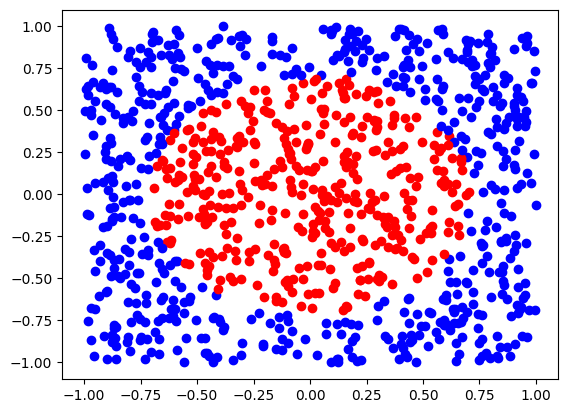

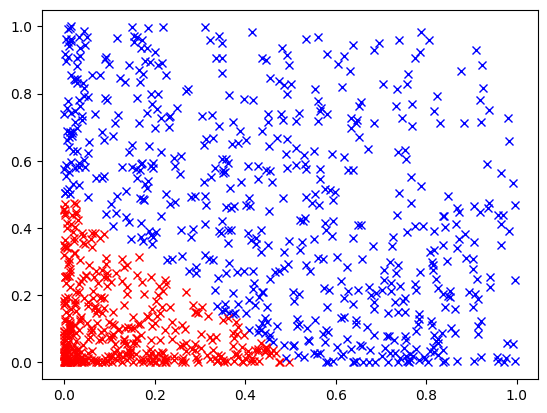

[[1.00000000e+00 1.69213406e-02 1.09127356e-04]
 [1.00000000e+00 2.80611815e-02 2.35695630e-03]
 [1.00000000e+00 8.37203419e-01 3.75975897e-02]
 ...
 [1.00000000e+00 3.05976399e-04 4.58029557e-01]
 [1.00000000e+00 9.79545293e-01 7.26543548e-01]
 [1.00000000e+00 1.84457710e-01 7.08668674e-03]]
[249.80434274]
acc is :  0.987


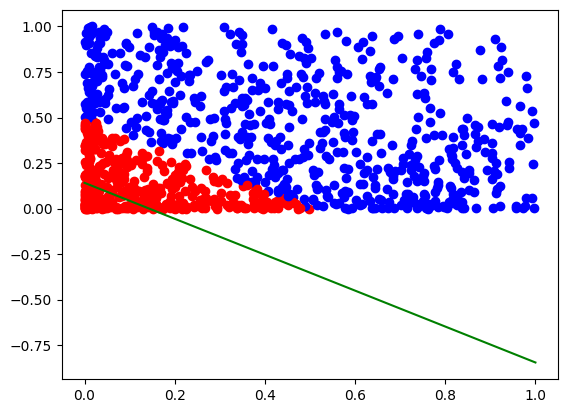

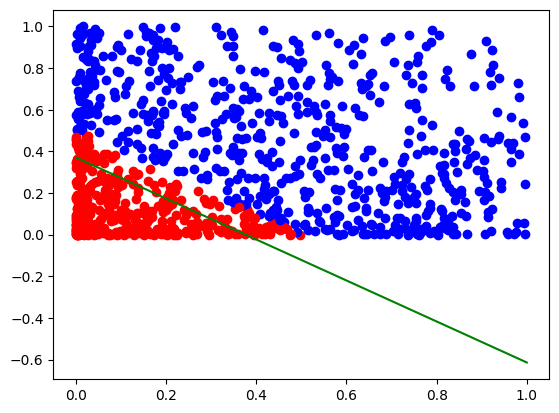

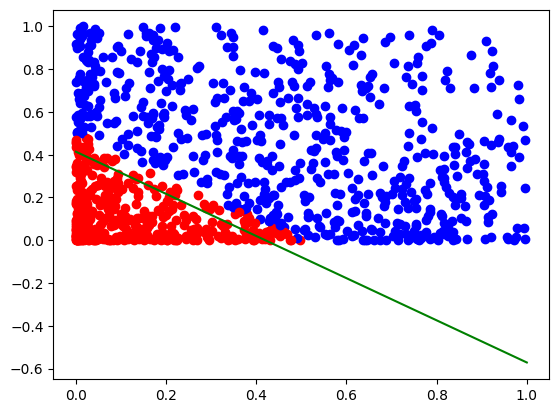

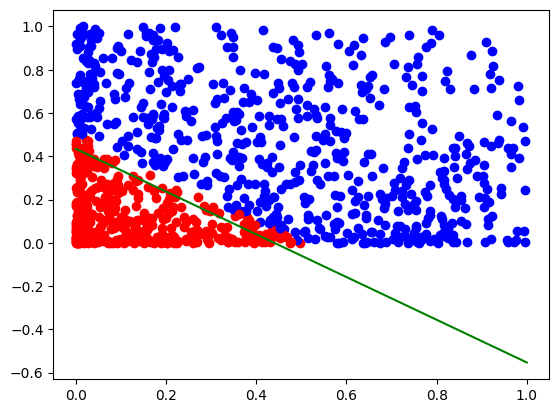

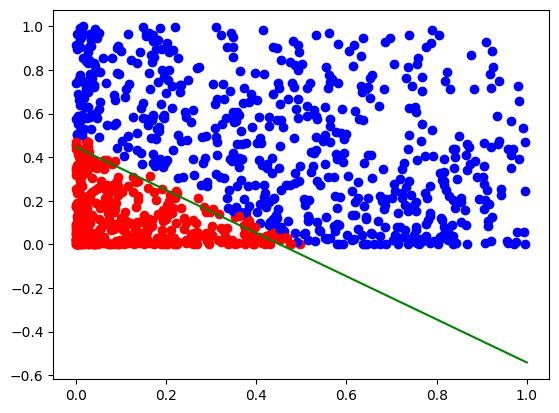

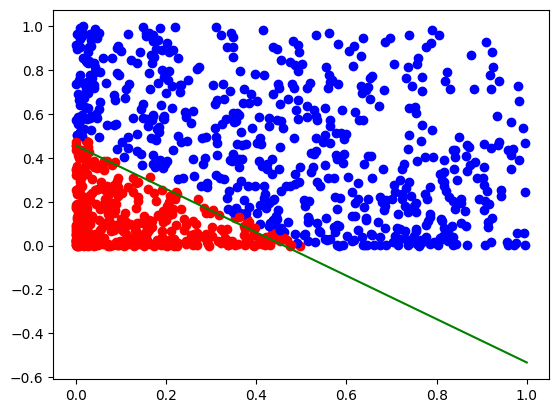

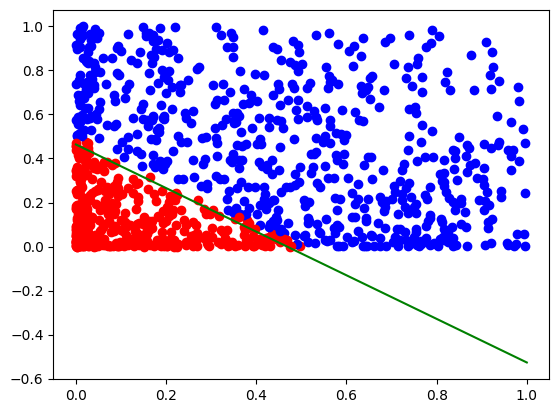

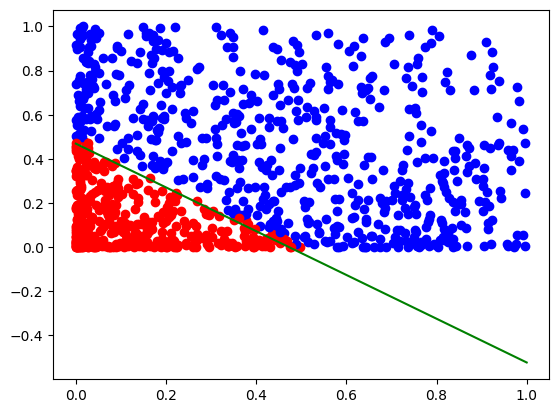

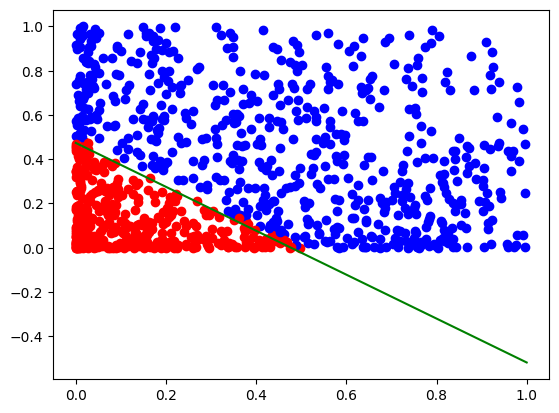

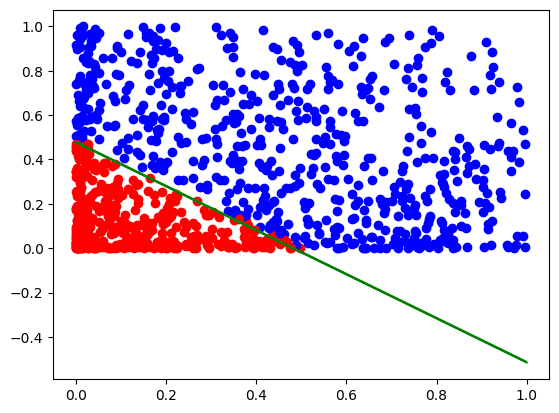

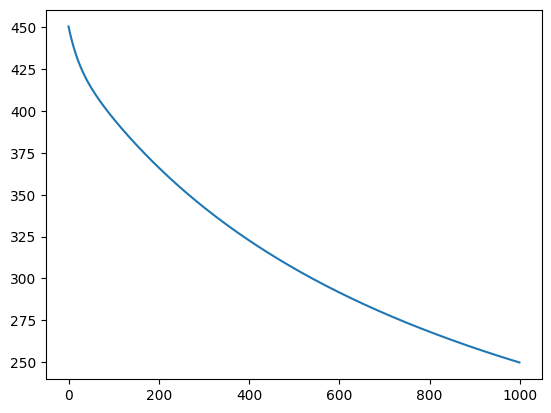

In [265]:
#Q1
num_data = 1000  # data points per class

X = np.random.uniform(-1, 1, [2, num_data])
y = X[0, :] ** 2 + X[1, :] ** 2 - 0.5 > 0
y = (y[None, :]).astype(np.int8)
plotClass(X, y, 'o')
X = X ** 2
plotClass(X, y, 'x')
X = X.T
y = y.T

startModel(X, y)

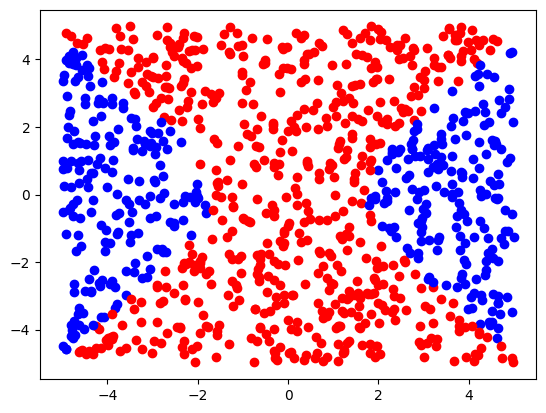

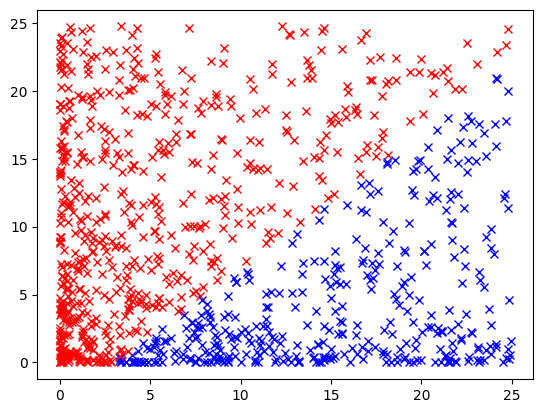

[[ 1.         12.56332006 16.95243542]
 [ 1.          1.05748059 12.48435953]
 [ 1.          0.82410668  2.97024021]
 ...
 [ 1.          4.2580077   0.05001741]
 [ 1.          9.82082984 15.43466445]
 [ 1.          0.40455698 21.91855714]]
[52.04483239]
acc is :  0.986


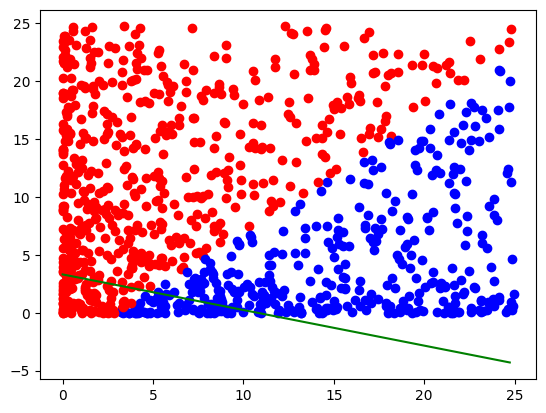

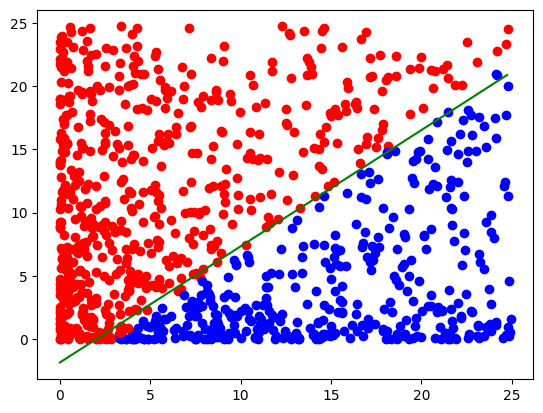

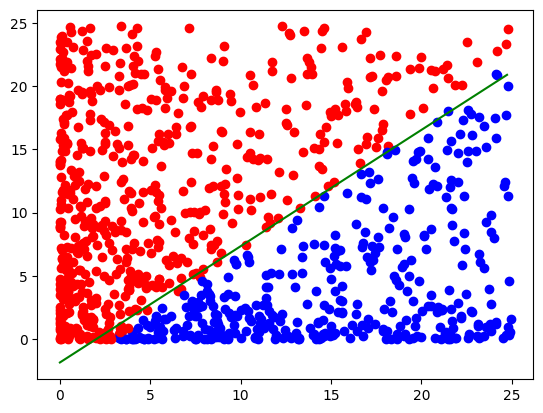

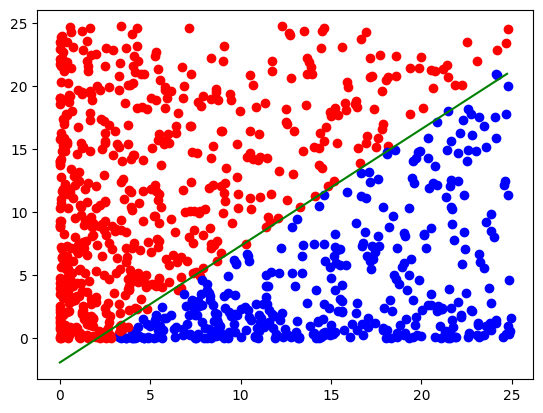

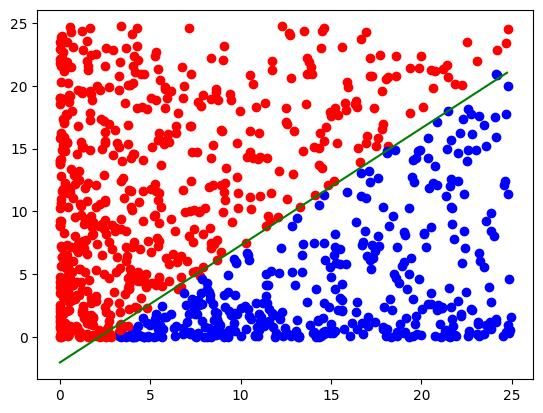

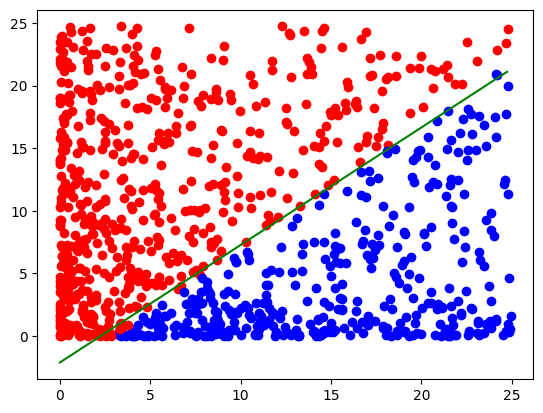

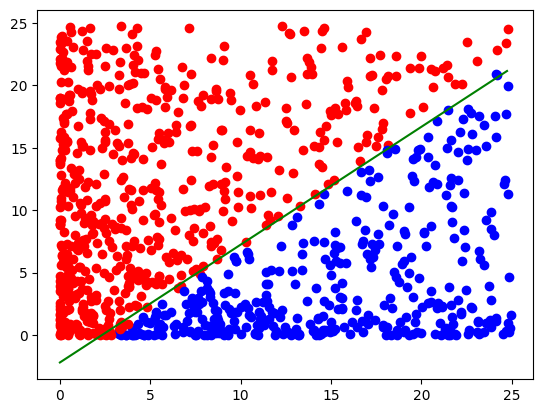

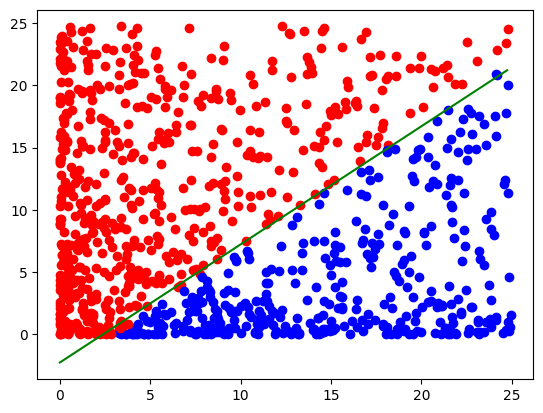

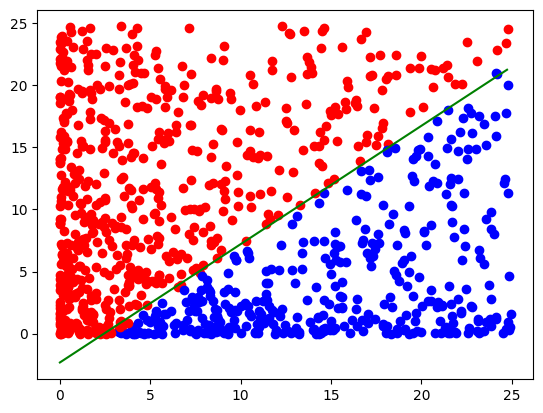

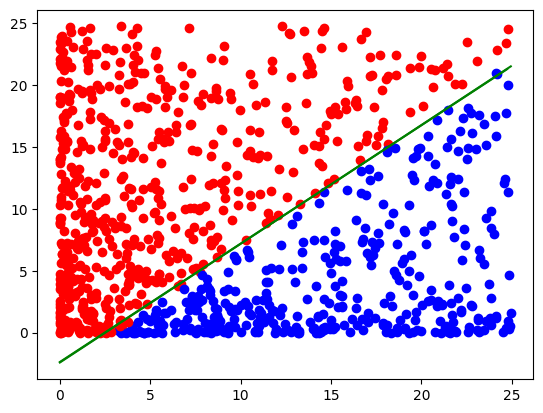

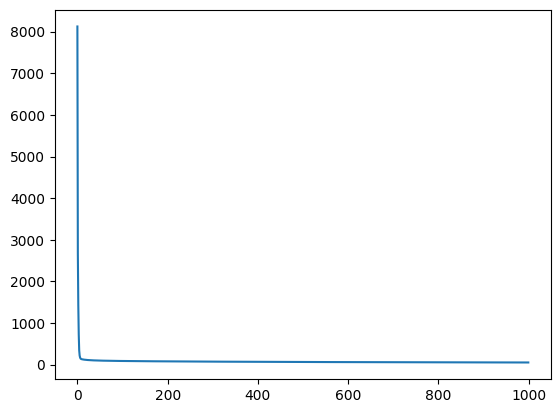

In [263]:
#Q2
num_data = 1000  # data points per class

X = np.random.uniform(-5, 5, [2, num_data])
y = X[0, :] ** 2 - X[1, :] ** 2 - 3 > 0
y = (y[None, :]).astype(np.int8)
plotClass(X, y, 'o')
X = X ** 2
plotClass(X, y, 'x')

X = X.T
y = y.T
startModel(X, y)


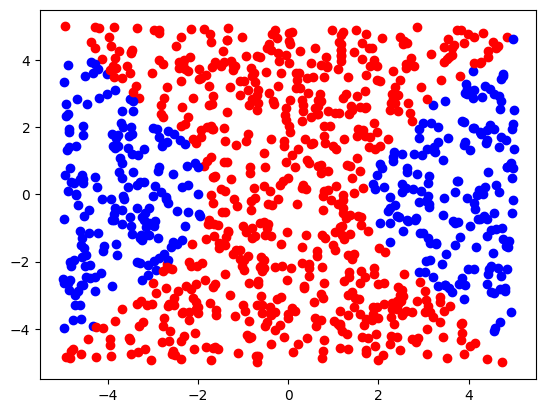

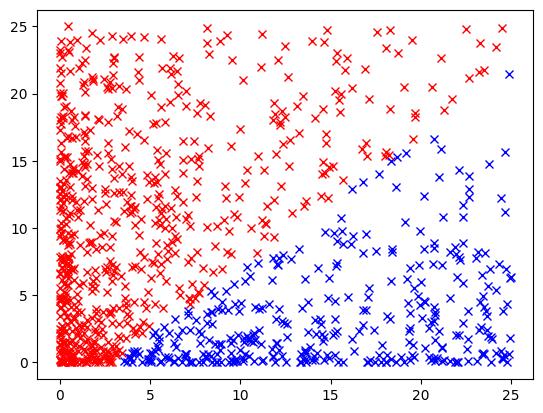

acc is :  0.99


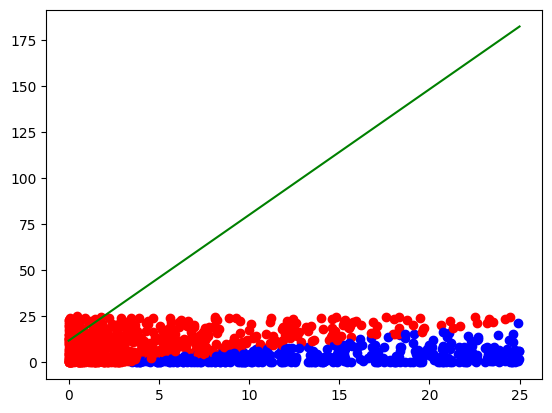

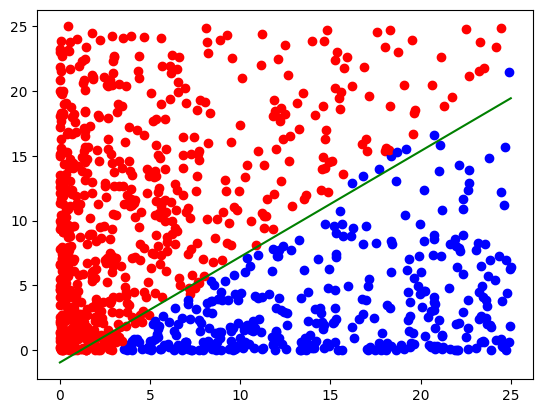

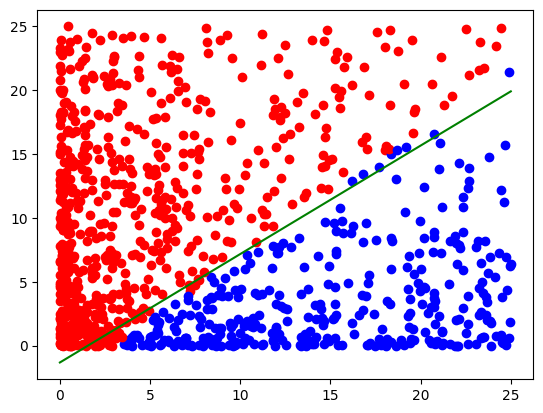

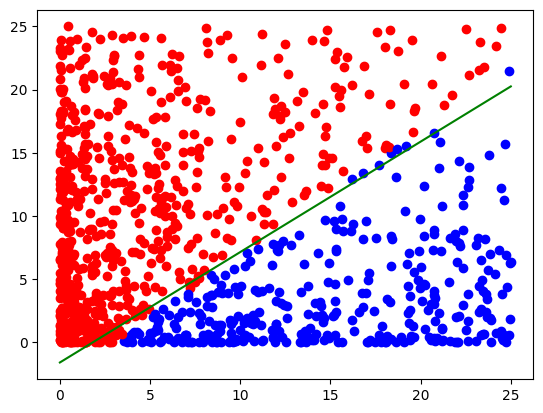

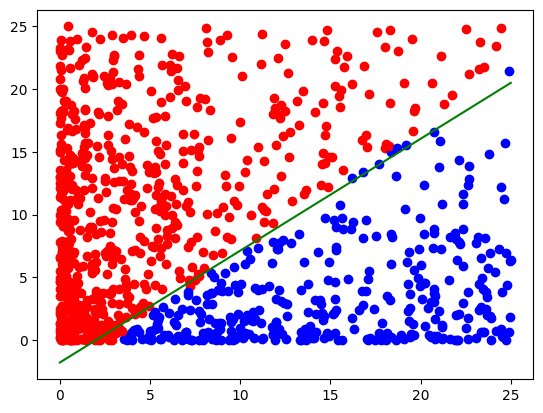

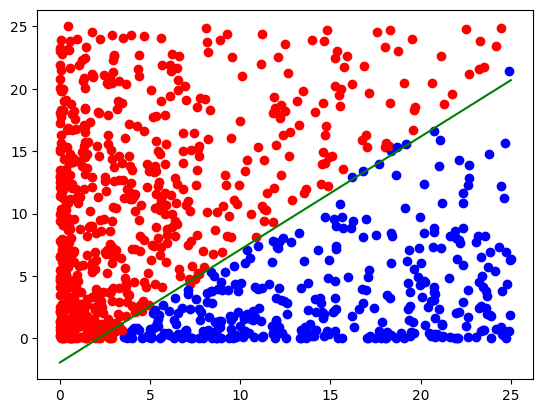

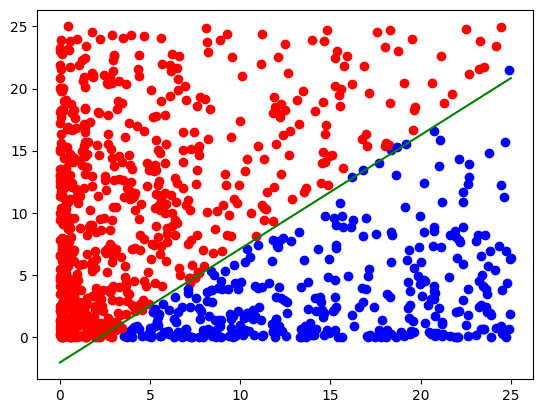

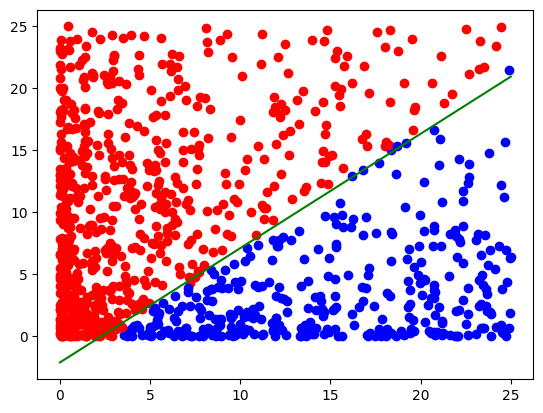

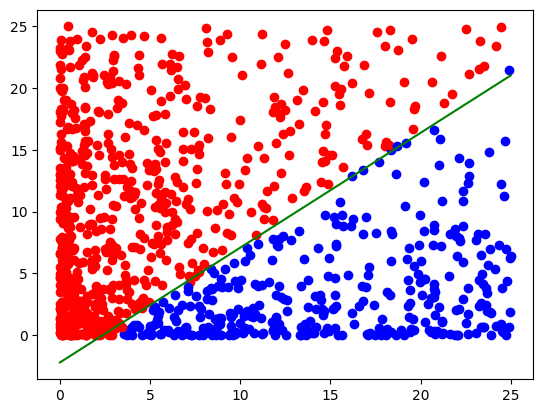

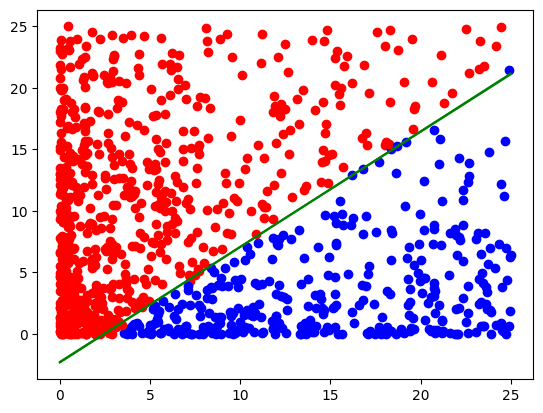

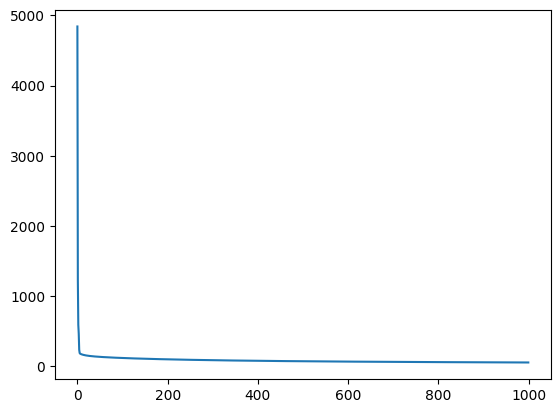

In [252]:
#Q3
num_data = 1000  # data points per class

X = np.random.uniform(-5, 5, [2, num_data])
y = X[0, :] ** 2 - X[1, :] ** 2 - 3 > 0
y = (y[None, :]).astype(np.int8)
plotClass(X, y, 'o')
X = X ** 2
plotClass(X, y, 'x')

X = X.T
y = y.T
startModel(X, y)


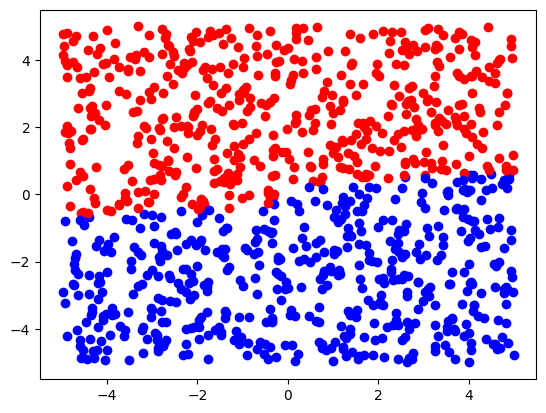

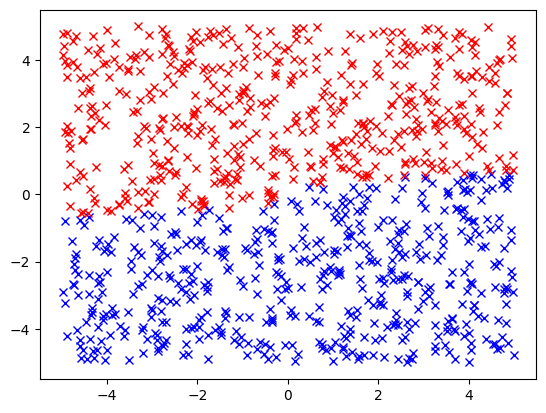

acc is :  0.986


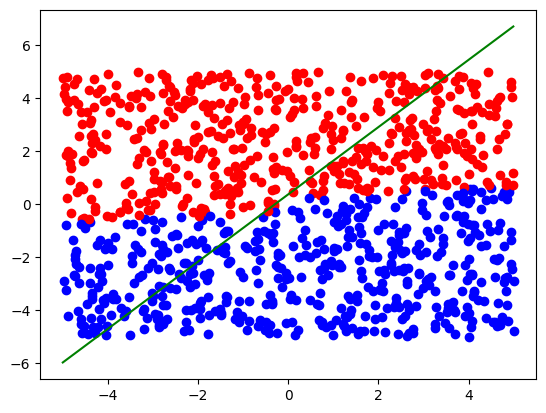

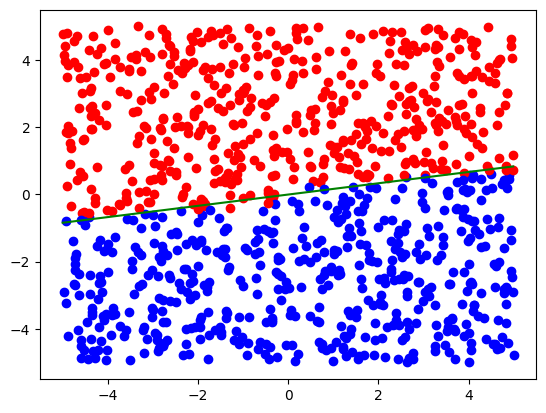

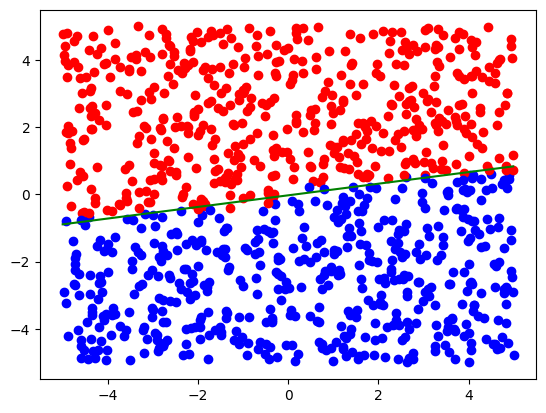

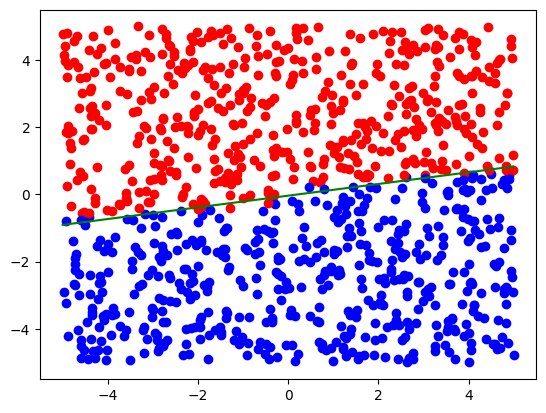

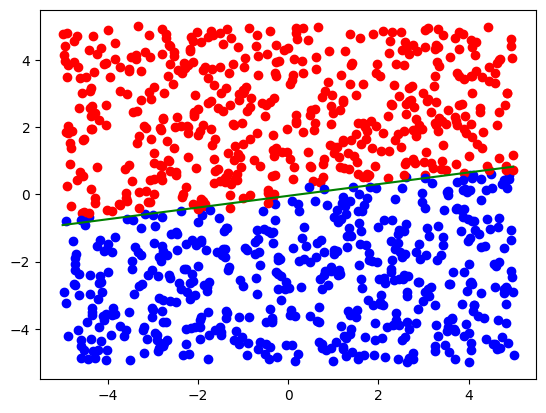

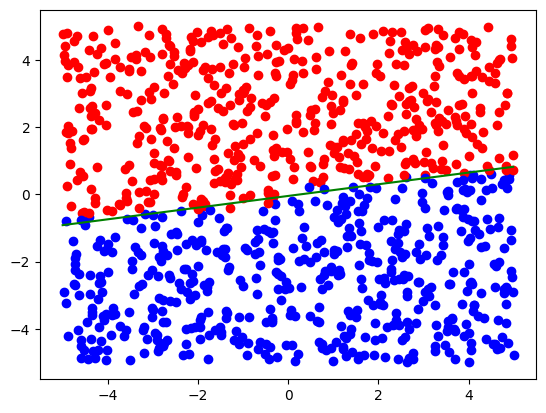

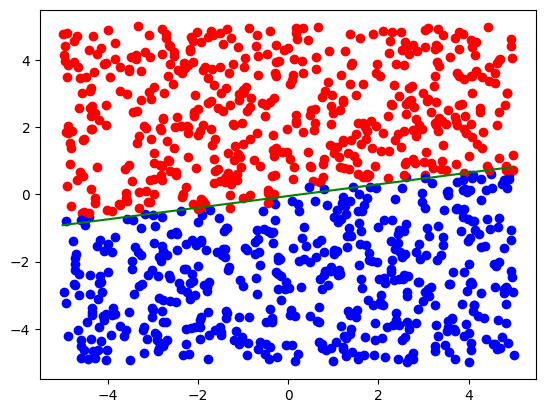

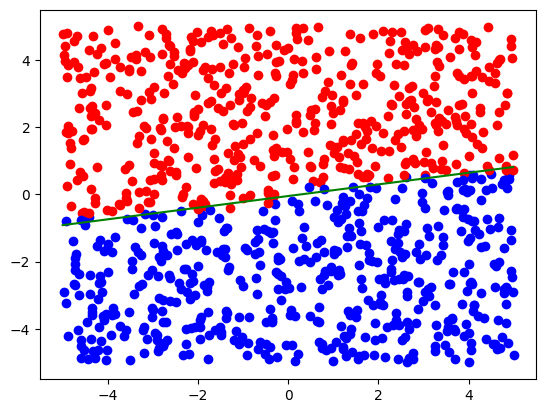

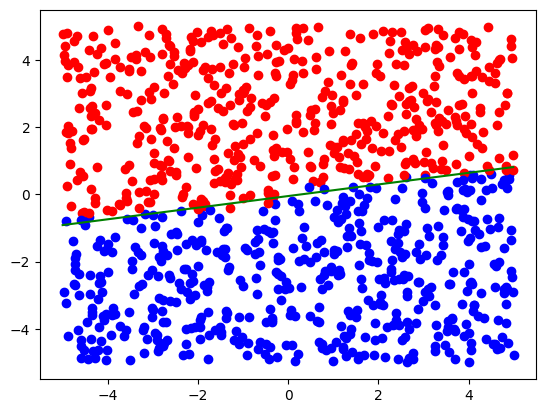

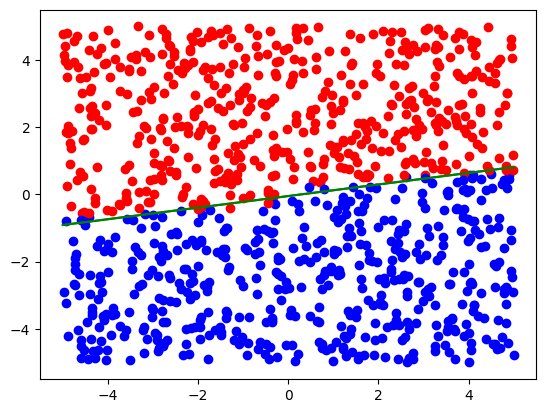

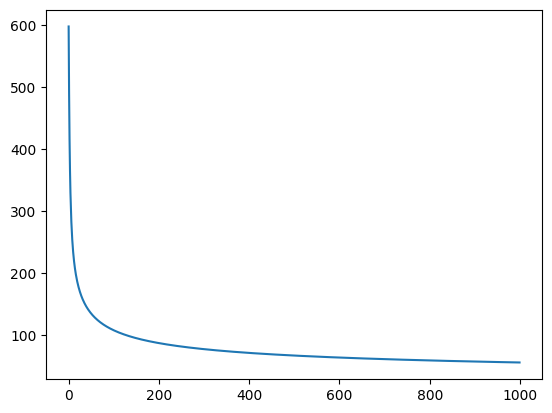

In [251]:
#Q5
num_data = 1000  # data points per class

X = np.random.uniform(-5, 5, [2, num_data])
y = X[0, :] - 20 * X[1, :] ** 3 > 0
y = (y[None, :]).astype(np.int8)
plotClass(X, y, 'o')
plotClass(X, y, 'x')

X = X.T
y = y.T
startModel(X, y)

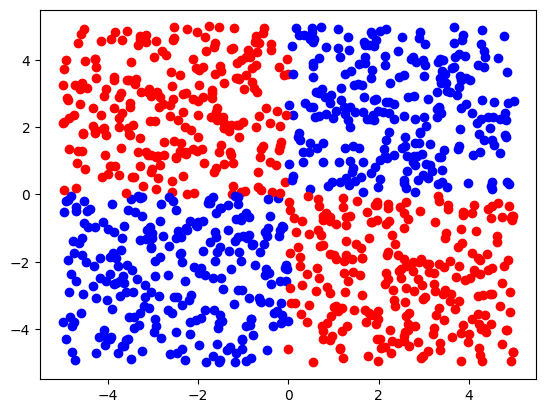

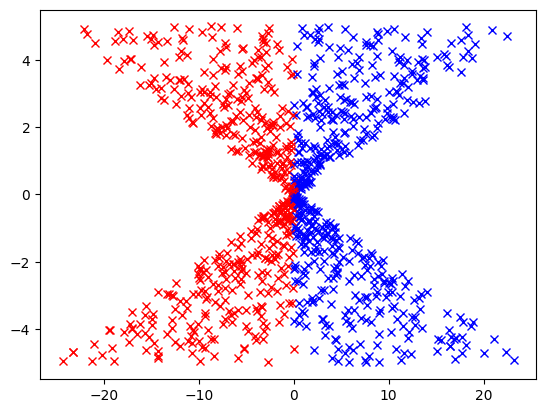

acc is :  0.998


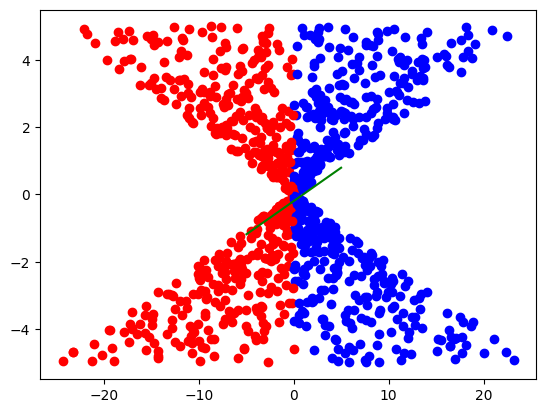

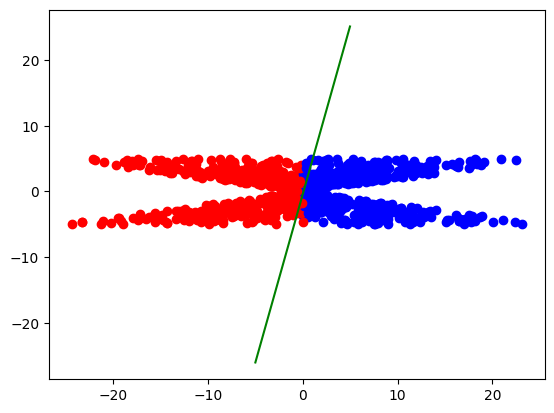

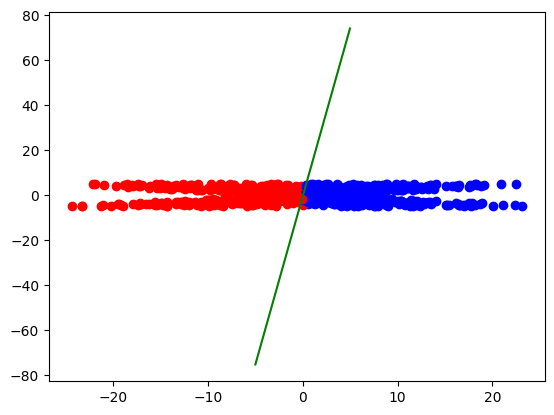

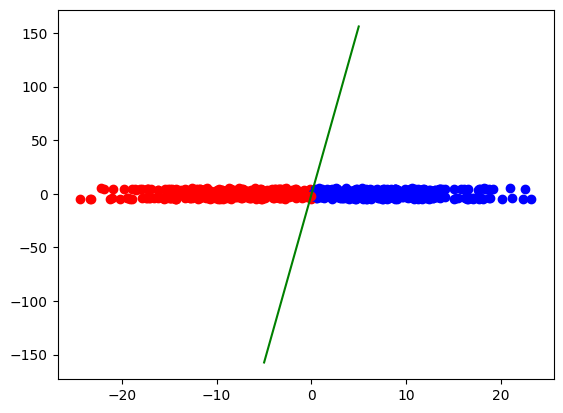

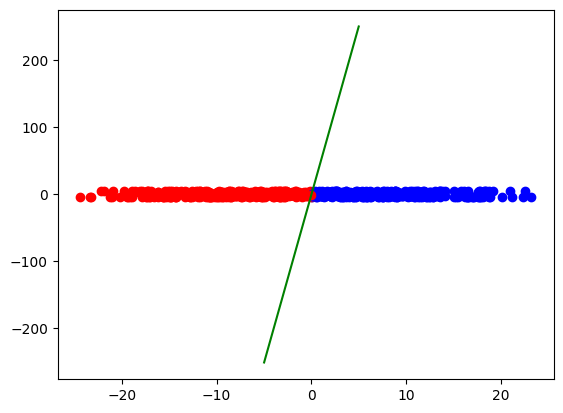

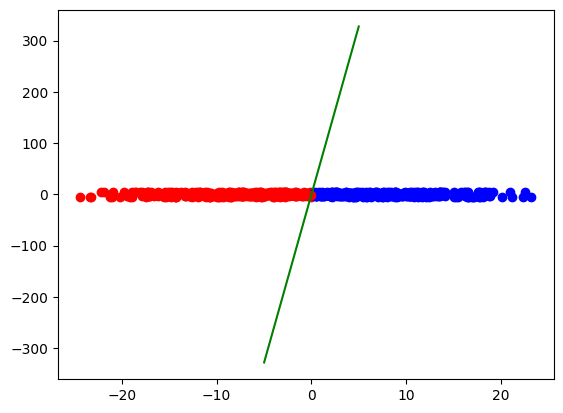

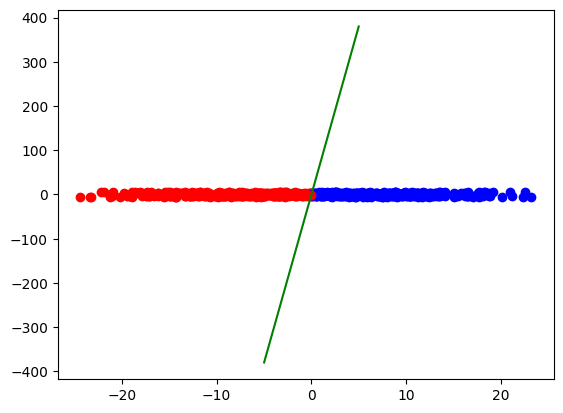

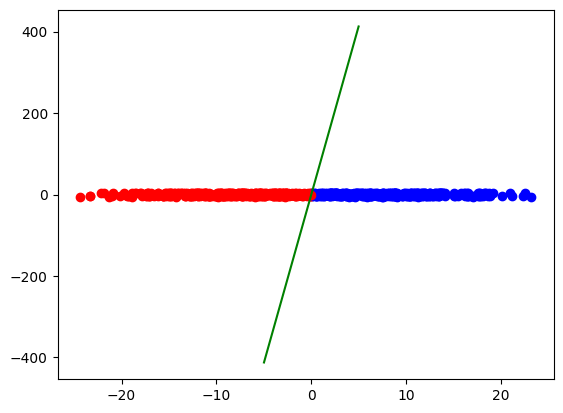

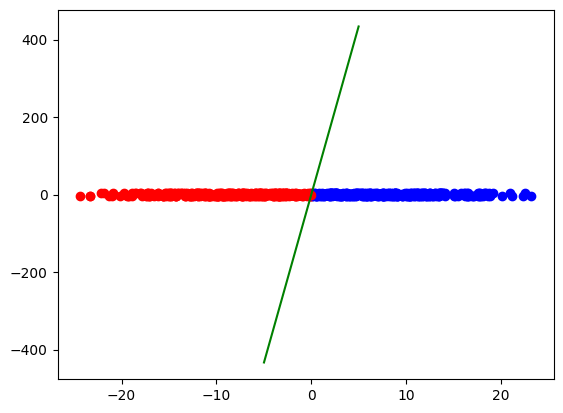

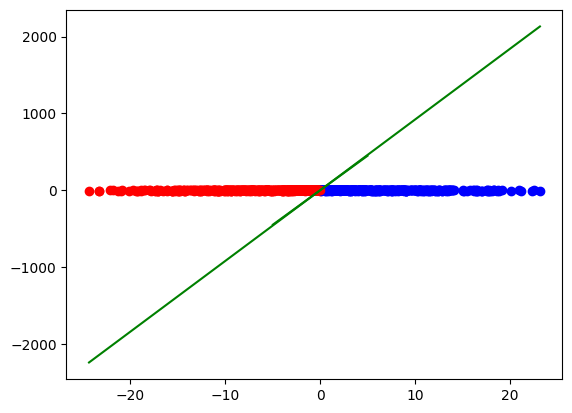

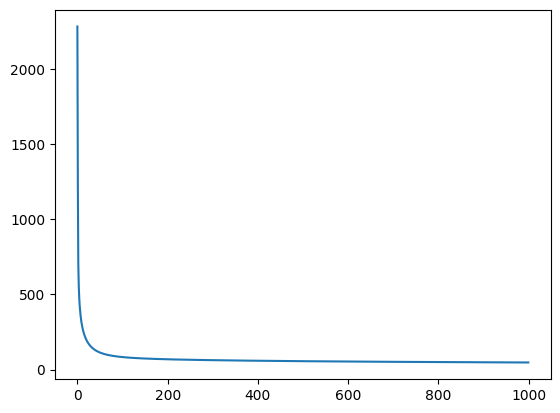

In [250]:
#Q6
num_data = 1000  # data points per class

X = np.random.uniform(-5, 5, [2, num_data])
y = X[0, :] * X[1, :] > 0
y = (y[None, :]).astype(np.int8)
plotClass(X, y, 'o')
X[0, :] = X[0, :] * X[1, :]
plotClass(X, y, 'x')
X = X.T
y = y.T
startModel(X, y)